In [5]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd : float
    total_inr : float
    

In [7]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convet_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [10]:
from langgraph.graph import StateGraph,START,END

builder = StateGraph(PortfolioState)

builder.add_node('Calc_total_node',calc_total)
builder.add_node("Convert_to_inr_node",convet_to_inr)

builder.add_edge(START,'Calc_total_node')
builder.add_edge('Calc_total_node','Convert_to_inr_node')
builder.add_edge('Convert_to_inr_node',END)

graph = builder.compile()


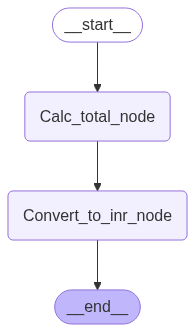

In [11]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({'amount_usd':1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}